# Критические сети и бета-устойчивые уровни

Код по мотивам статьи https://users.cs.duke.edu/~tomasi/papers/gu/guEccv10.pdf:

`Gu, Steve, Ying Zheng, and Carlo Tomasi. "Critical nets and beta-stable features for image matching." European Conference on Computer Vision. Springer Berlin Heidelberg, 2010`

Строится пирамида изображений из последовательных приближений лапласиана: $L_k \approx J_{k+1} - J_k = G_{\sqrt{k+1}\sigma}*I - G_{\sqrt{k}\sigma}*I$. Далее для каждого изображения $L^+_k = L_k > 0$ (содержащего максимально выпуклые области) считается число компонент связности. Уровень $k$ называется $\beta$-устойчивым уровнем, если число компонент связности в $L^+_{\xi}$ при каждом $\xi \in [k - \beta; k)$ одинаково.

Далее для бета-устойчивого уровня считаются экстремумы (по сути это особые точки SIFT), на которых потом строится граф.

# Исходное изображение

In [1]:
%config InlineBackend.figure_format = 'retina'
import importlib as imp
import numpy as np
from skimage import io
from matplotlib import pyplot as plt
from sklearn.cluster import DBSCAN

import cnet
import utils as utl

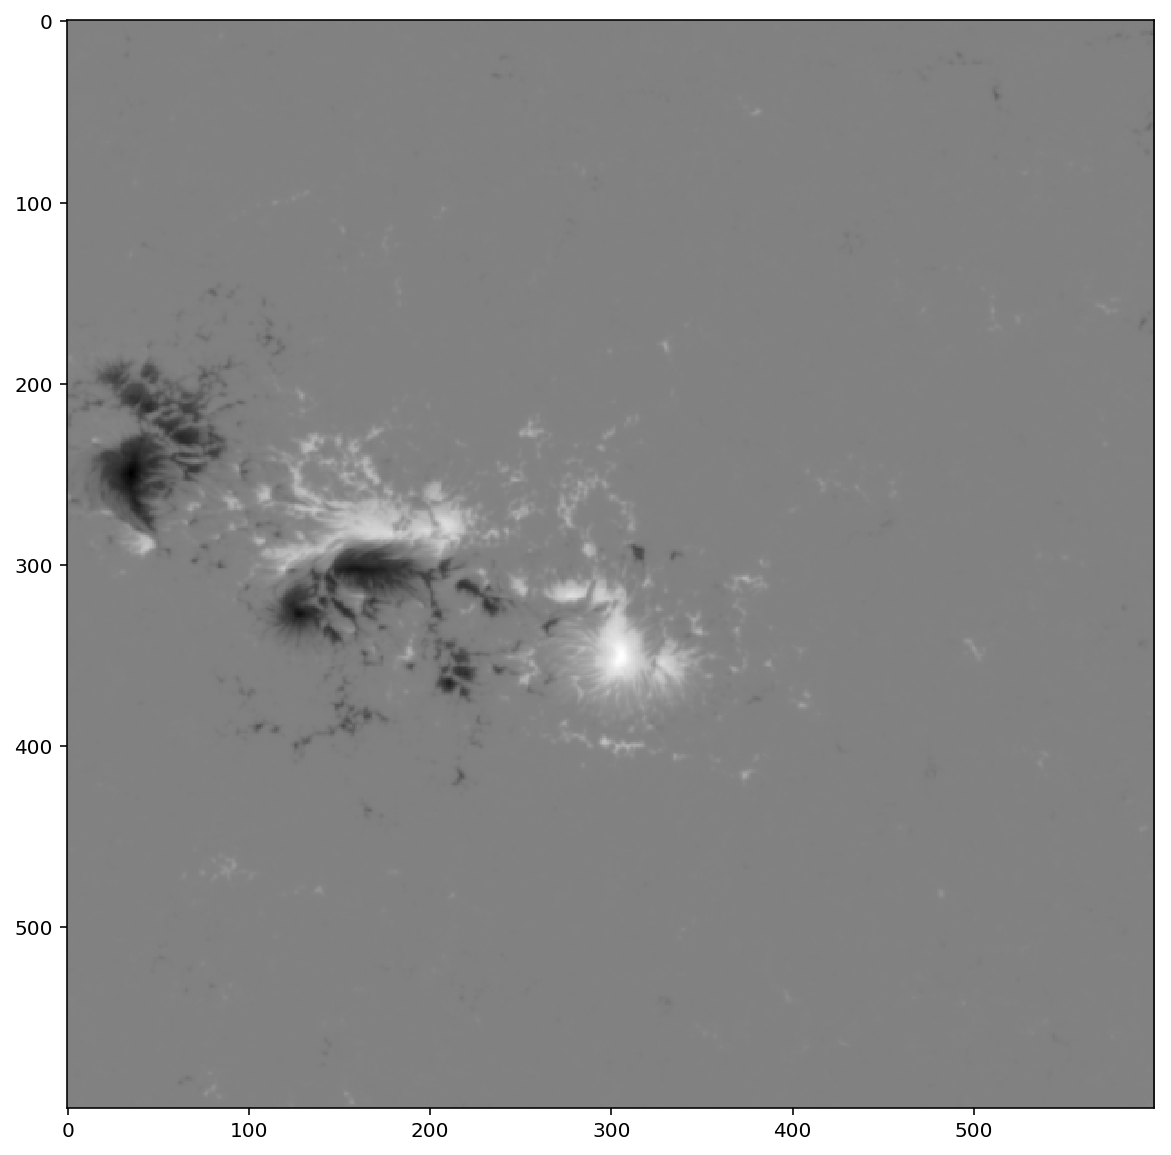

In [3]:
filepath = 'data/images/hmi.M_720s.20110214_000000_TAI.1.magnetogram.fits'
img = utl.read_fits(filepath)
img = utl.scale_img(img)
plt.figure(figsize=(10, 10))
plt.imshow(img, cmap='gray')
plt.show()

# $\beta$-устойчивые масштабы

Для каждого изображения из пирамиды ищем такое наименьшее $k$ и такое число $\beta$, что число компонент связаности при масштабе $s \in [k-\beta; k)$, не меняется. Таких $\beta$, естественно, может быть найдено несколько.

In [4]:
log, components, beta_scales, betas = cnet.cpt_stable_log(filepath, ss_sigma=1.6)
print(list(zip(beta_scales, betas)))

[(24, 2), (34, 2), (39, 3), (45, 2), (51, 2), (57, 2), (63, 3), (69, 2), (75, 6), (79, 4), (86, 5), (91, 3), (93, 2), (99, 5)]


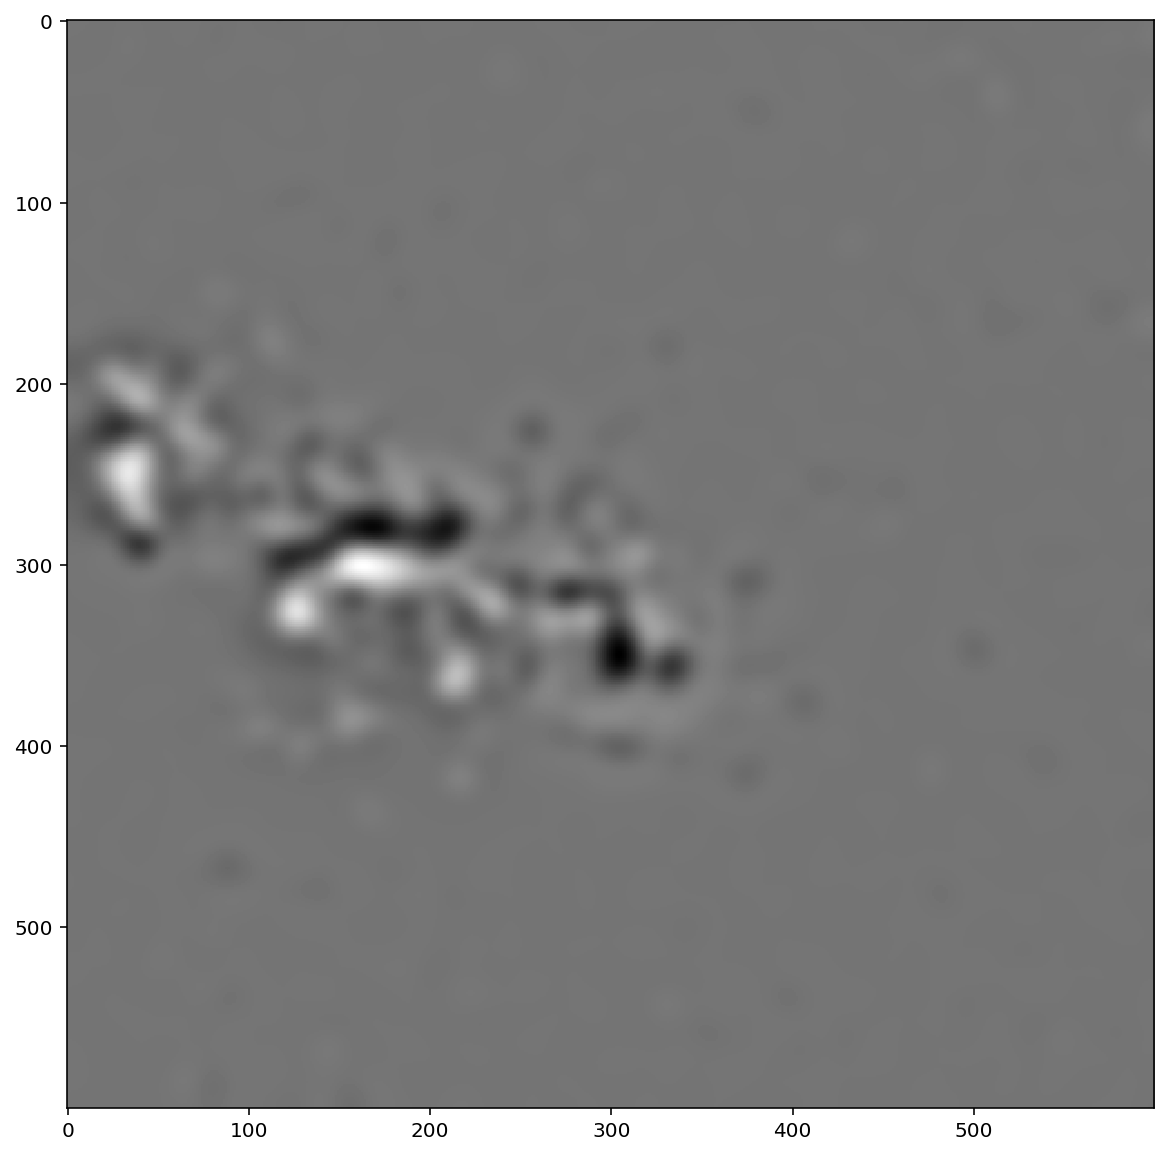

In [5]:
plt.figure(figsize=(10, 10))
plt.imshow(log[30], cmap='gray')
plt.show()

## График количества компонент связности бинаризованных лапласианов в зависимости от масштаба

Под масштабом здесь понимается индекс $k$: $s = 1.6k$.

In [6]:
print(components)

[650, 390, 308, 234, 197, 165, 140, 133, 124, 110, 101, 95, 92, 85, 76, 78, 76, 77, 73, 67, 63, 58, 54, 51, 51, 49, 45, 46, 45, 44, 41, 43, 44, 42, 42, 40, 39, 37, 37, 37, 39, 38, 37, 38, 35, 35, 36, 35, 33, 32, 33, 33, 36, 34, 33, 32, 31, 31, 30, 28, 30, 28, 28, 28, 27, 28, 26, 28, 26, 26, 25, 25, 25, 25, 25, 25, 27, 27, 27, 27, 26, 27, 26, 26, 26, 26, 26, 25, 27, 26, 26, 26, 25, 25, 27, 28, 28, 28, 28, 28]


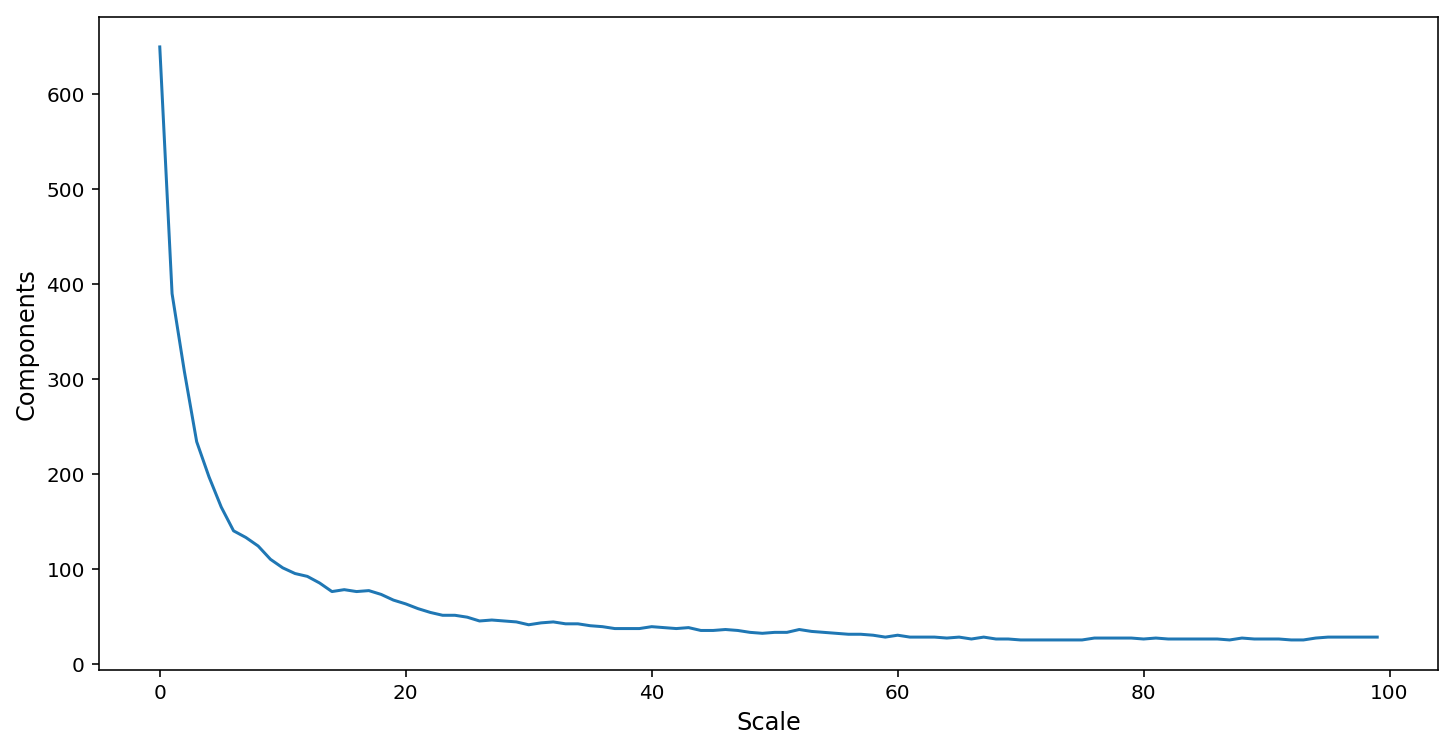

In [7]:
cnet.plot_components(components)
plt.show()

## График уровня $\beta$ в зависимости от масштаба $k$

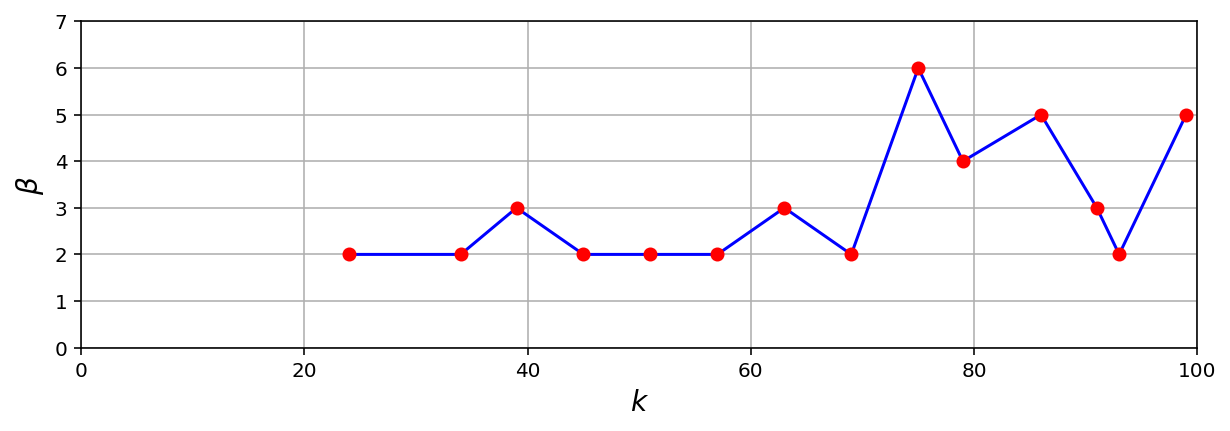

In [8]:
cnet.plot_betas(beta_scales, betas)
plt.show()

# Экстремумы (особые точки) $L_k$ для $\beta$-устойчивых масштабов

Т.к. масштаб $\beta$-устойчивый, то в пределах этого значения число экстремумов не должно меняться, поэтому особые точки можно искать в одном слое.

Для примера, считаем экстремумы для одного масштаба.

In [9]:
s_idx = cnet.select_level(5, betas)
s = beta_scales[s_idx]
print('Selected: (scale, beta) = (%d, %d)' % (s, betas[s_idx]))
lap = log[s]
minima, maxima = cnet.cpt_keypoints(lap, replace_clusters=True)
print('Minima: %d, maxima: %d' % (len(minima), len(maxima)))

Selected: (scale, beta) = (86, 5)
Minima: 9, maxima: 15


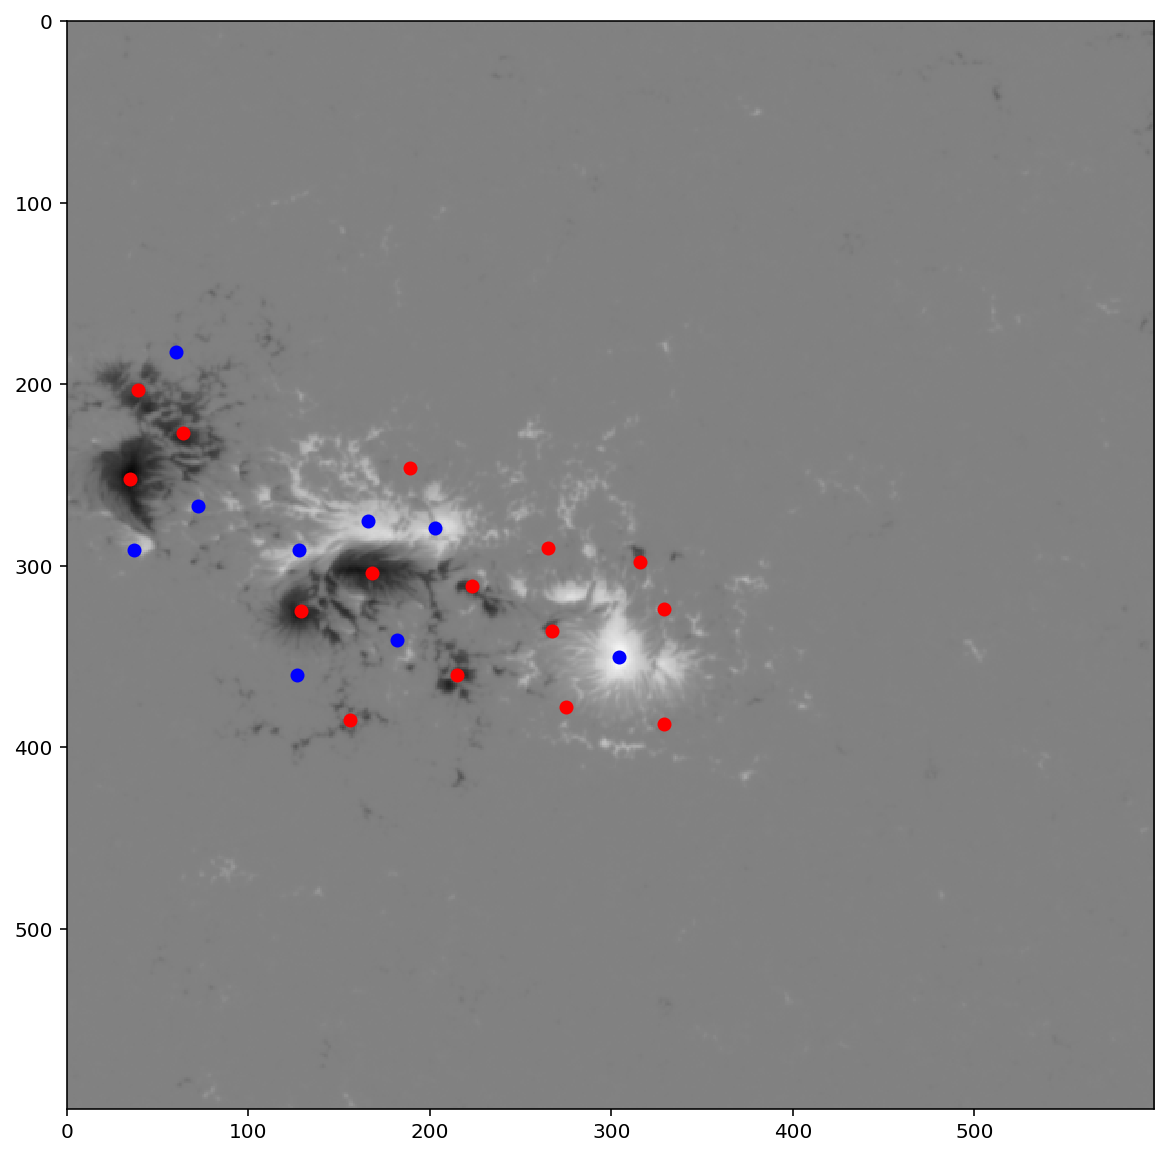

In [10]:
cnet.plot_keypoints(img, minima, maxima)
plt.show()

Красным точкам соответствуют максимумы, а синим минимумы.

# Критическая сеть для выбранного масштаба

In [11]:
edges = cnet.cpt_criticalnet(lap, minima, maxima)
print('Edges: %d' % len(edges))

Edges: 36


Точки не инцидентные ни одному ребру не будут отображаться.

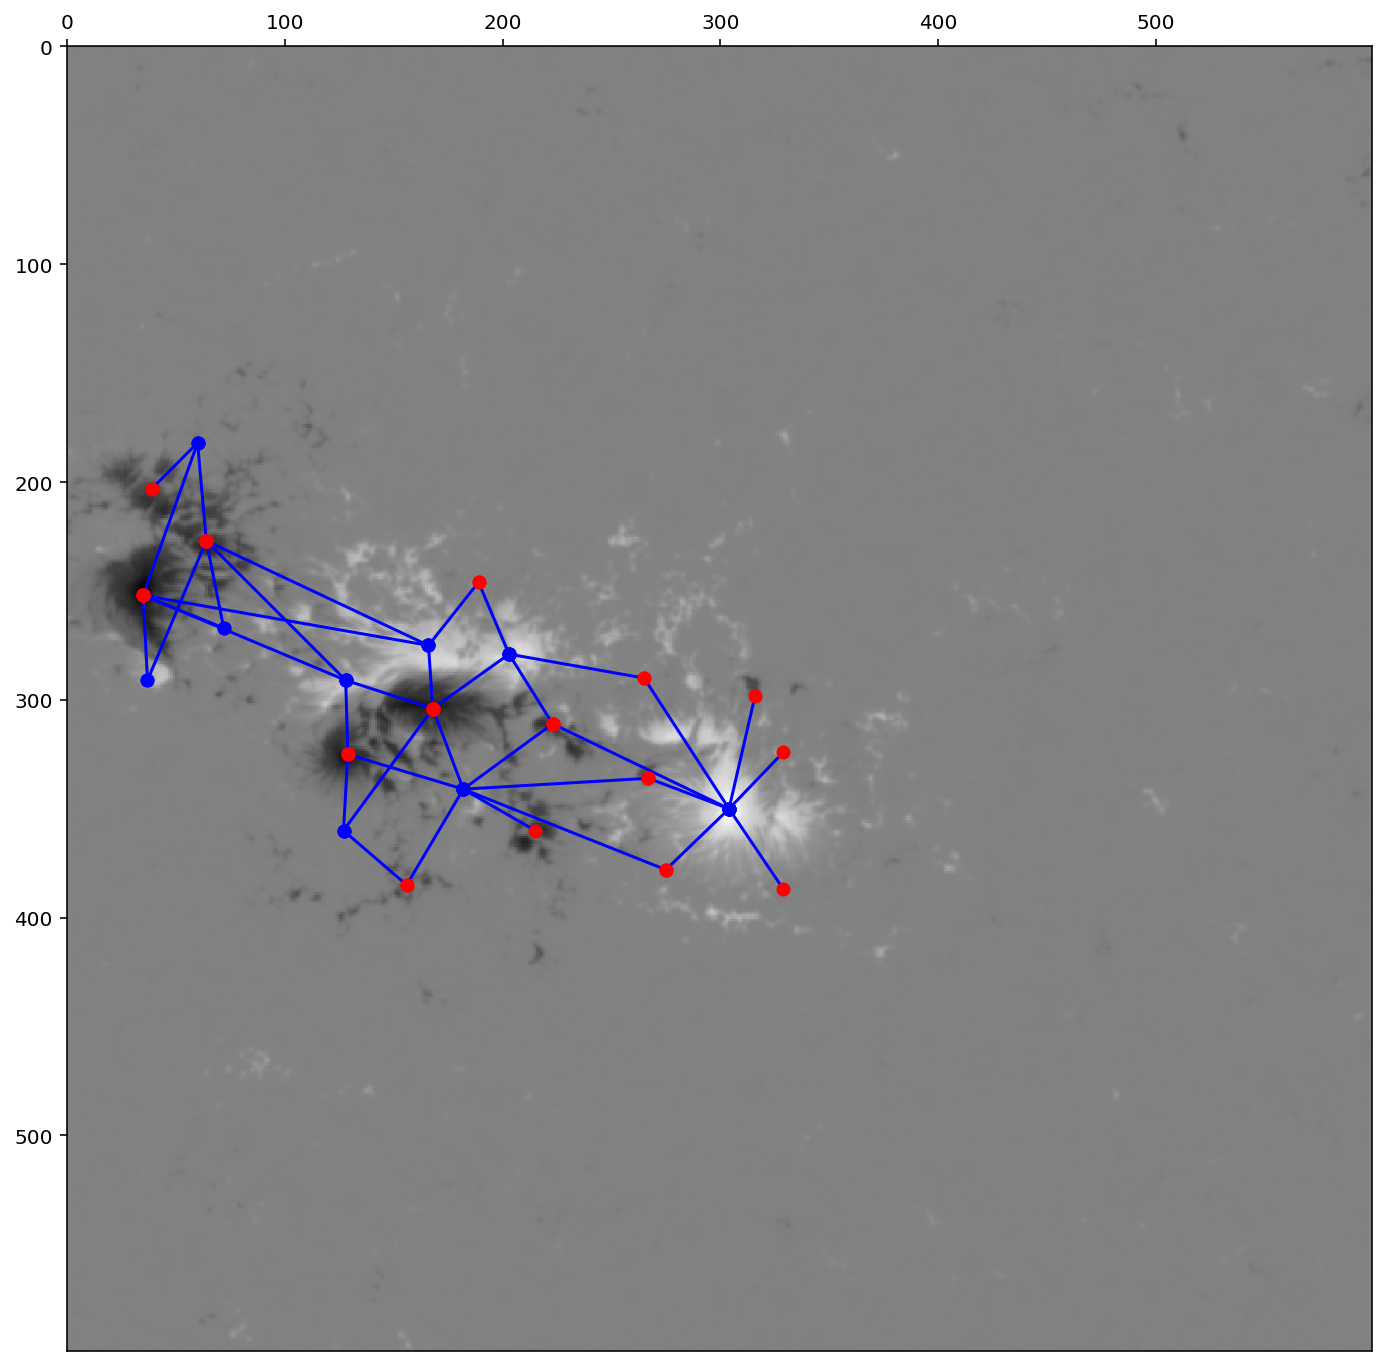

In [12]:
cnet.plot_criticalnet(img, edges)
plt.show()